# Importing Libraries and Packages

In [1]:
# Base
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# EDA
import missingno as msno

# Visualisation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree

# Text-Based Analyses
import gensim.downloader
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity

# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Voting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Classifiers
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                
from sklearn.linear_model import SGDClassifier                                      
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC                                                        
from sklearn.ensemble import AdaBoostClassifier 

# Hyperparameter Tuning
from sklearn.utils import shuffle

# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch  

# Scalers and Transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline                                               
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score  

In [2]:
# Set Seed
SEED = 50

# Importing Data

In [3]:
# Import data
path = "data/kickstarter_projects.csv"

df_kickstarter = pd.read_csv(path)
df_kickstarter.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [4]:
# Converting dates to datetime objects
df_kickstarter['Launched'] = pd.to_datetime(df_kickstarter['Launched'], format='%Y-%m-%d %H:%M:%S')
df_kickstarter['Deadline'] = pd.to_datetime(df_kickstarter['Deadline'], format='%Y-%m-%d')

# EDA

#### Data Overview

In [5]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [6]:
df_kickstarter.describe()

,ID,Launched,Deadline,Goal,Pledged,Backers
count,3.748530e+05,374853,374853,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,2014-09-26 12:22:30.728664320,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359
min,5.971000e+03,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2013-04-30 22:06:24,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,2014-12-02 19:02:35,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,2016-03-29 19:50:49,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,2018-01-02 15:02:31,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000
std,6.191377e+08,NaN,NaN,1.158778e+06,9.132054e+04,911.718520


Suspect right-skewed distributions for Goal, Pledged, and Backers.

In [7]:
# Check for duplicates
df_kickstarter.duplicated().sum()

0

# Visualizations and Data Cleaning

#### Numerical feature distribution

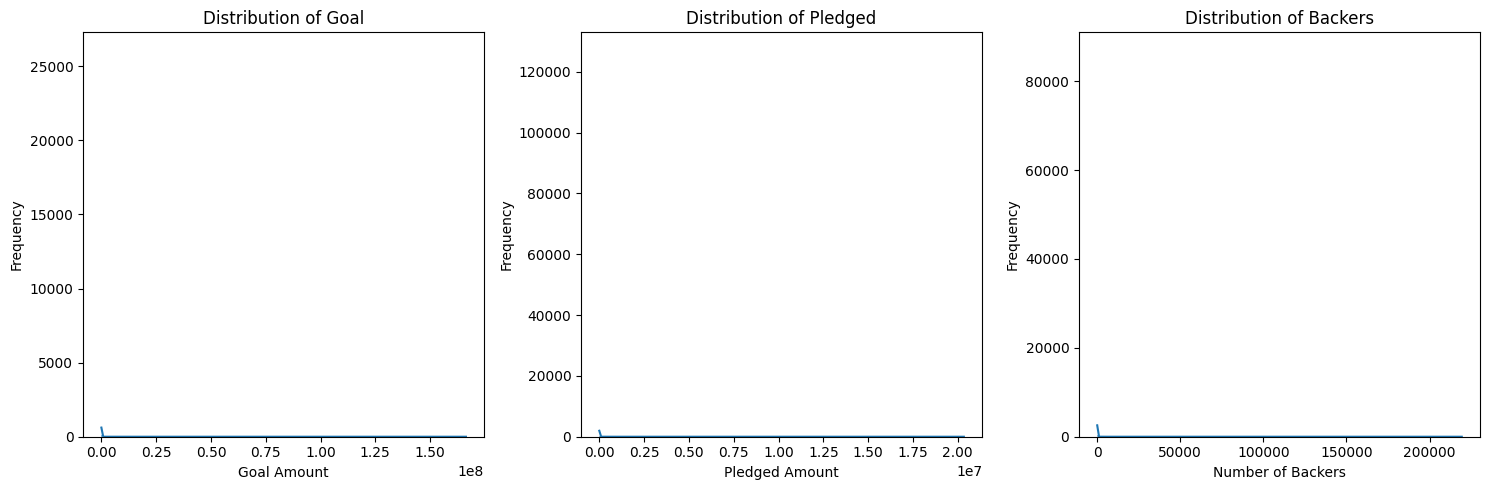

In [8]:
# Plotting Histograms of numeric columns Goal, Pledged, Backers
# WARNING: Running this takes forever
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['Goal'], kde=True)
plt.title('Distribution of Goal')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['Pledged'], kde=True)
plt.title('Distribution of Pledged')
plt.xlabel('Pledged Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['Backers'], kde=True)
plt.title('Distribution of Backers')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
# Log transform the numerical columns. Handle potential errors from log(0)
def log_transform(x):
    return np.log1p(x)

df_kickstarter['log_Goal'] = log_transform(df_kickstarter['Goal'])
df_kickstarter['log_Pledged'] = log_transform(df_kickstarter['Pledged'])
df_kickstarter['log_Backers'] = log_transform(df_kickstarter['Backers'])

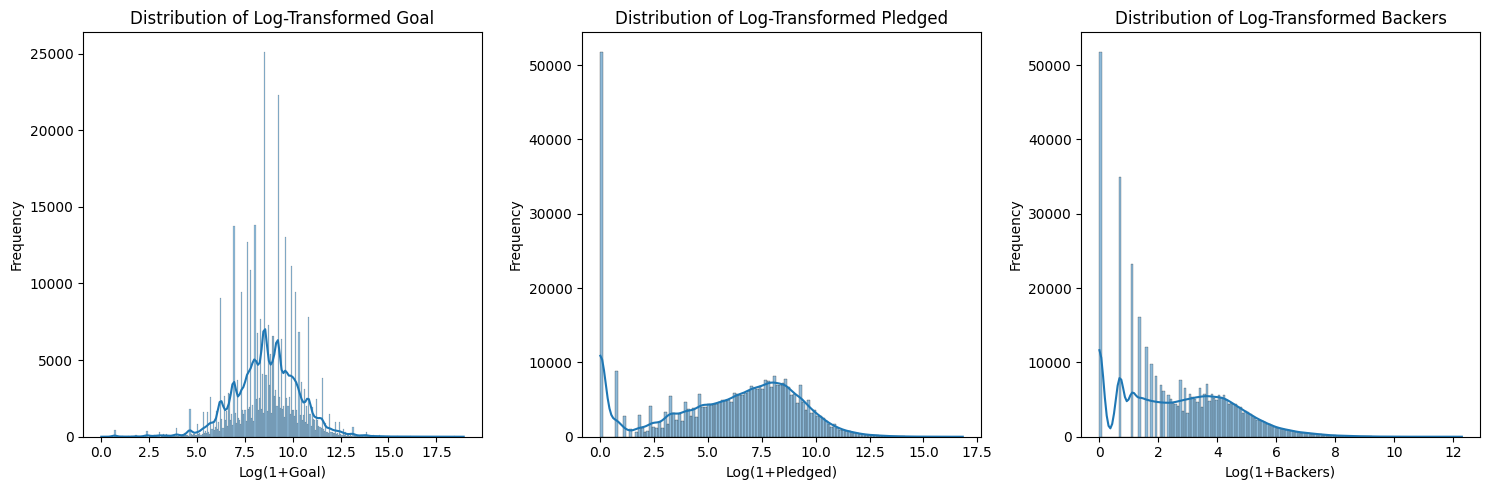

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['log_Goal'], kde=True)
plt.title('Distribution of Log-Transformed Goal')
plt.xlabel('Log(1+Goal)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['log_Pledged'], kde=True)
plt.title('Distribution of Log-Transformed Pledged')
plt.xlabel('Log(1+Pledged)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['log_Backers'], kde=True)
plt.title('Distribution of Log-Transformed Backers')
plt.xlabel('Log(1+Backers)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

log-transformed distributions look much better and more interpretable. Some observations:
- left peaks near zero: log-Pledged and log-Backers have sharp peak near 0 (very small or no funding/backers)
- distribution shapes: log-goal appears roughly symmetrical after transformation, indicating most projects have mid-range funding goals 

#### Correlation Analysis

In [10]:
# Select numerical columns for correlation analysis
numerical_cols = ['Goal', 'Pledged', 'Backers', 'log_Goal', 'log_Pledged', 'log_Backers']

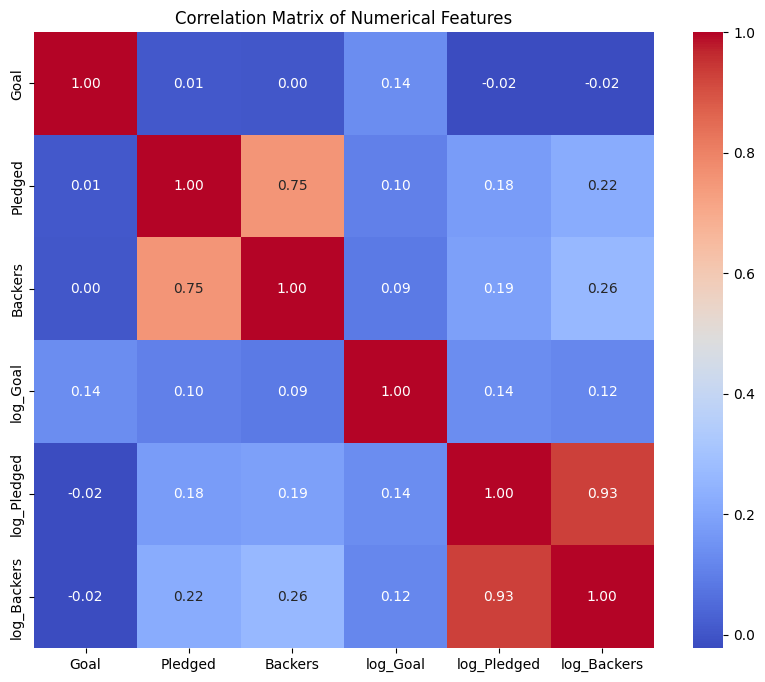

In [11]:
# Calculate and plot Correlation matrix
correlation_matrix = df_kickstarter[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

High correlation between 'Pledged' and 'Backers' bzw. 'log_Pledged' and 'log_Backers' - potentially problematic. Options to handle:
- drop 1 feature, keep the other
- combine them into a new feature that captures the information from both variables, e.g. 'Pledge_per_Backer' (Ratio to analyze funding efficiency)
- PCA to reduce multicollinearity and create uncorrelated components from highly correlated features
- algorithm-specific solutions: dtrees, xgb don't mind correlated features

#### Relationships with the Target Variable

In [12]:
df_kickstarter['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [13]:
# Filter for successful/failed campaigns and convert to binary
df_kickstarter_filtered = df_kickstarter[df_kickstarter['State'].isin(['Successful', 'Failed'])]
df_kickstarter_filtered['State_num'] = df_kickstarter_filtered['State'].map({'Successful': 1, 'Failed': 0})

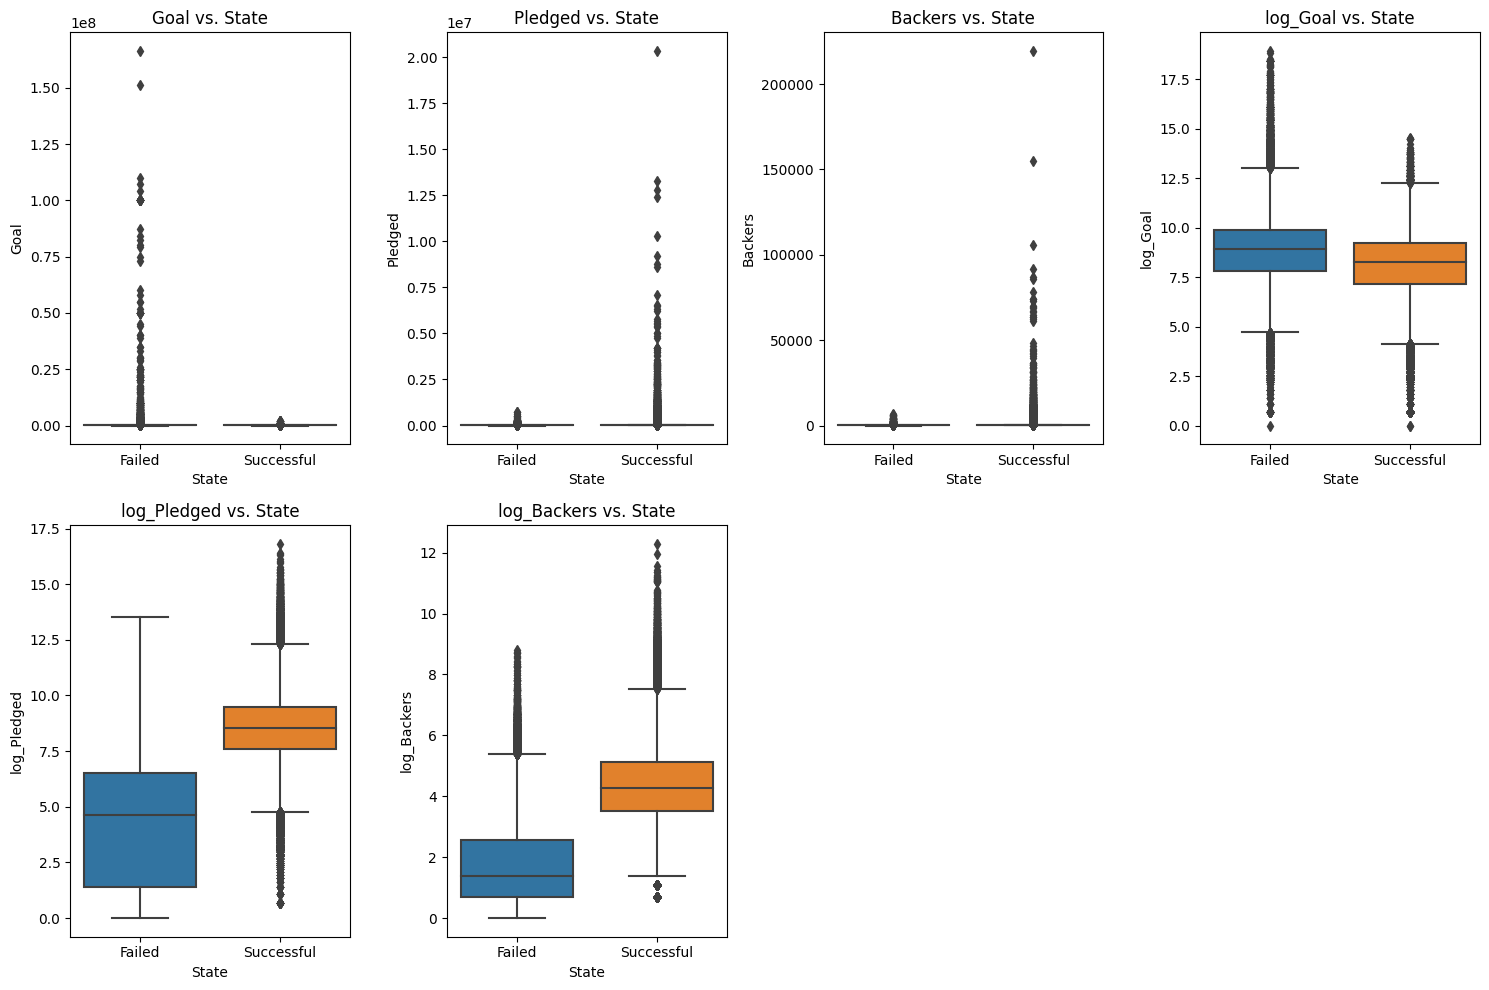

In [14]:
# Create box plots to compare distributions for successful vs. unsuccessful projects
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)  # Adjust subplot layout if you have more features
    sns.boxplot(x='State', y=col, data=df_kickstarter_filtered)
    plt.title(f'{col} vs. State')

plt.tight_layout()
plt.show()


In [15]:
# Summary Statistics:
summary_stats = df_kickstarter_filtered.groupby('State')[numerical_cols].agg(['mean', 'median'])
print(summary_stats)

                    Goal               Pledged             Backers          
                    mean  median          mean  median        mean median   
State                                                                       
Failed      63189.223940  7500.0   1321.105434   100.0   16.431236    3.0  \
Successful   9535.703177  3840.0  22664.492249  5109.0  264.128397   71.0   

            log_Goal           log_Pledged           log_Backers            
                mean    median        mean    median        mean    median  
State                                                                       
Failed      8.891018  8.922792    4.219971  4.615121    1.682344  1.386294  
Successful  8.127745  8.253488    8.555972  8.538955    4.392724  4.276666  


#### Distribution of the Target Variable

In [16]:
# In absolute Numbers
state_counts = df_kickstarter_filtered['State'].value_counts()
print(state_counts)

State
Failed        197611
Successful    133851
Name: count, dtype: int64


In [17]:
# In Percentage
state_percentage = df_kickstarter_filtered['State'].value_counts(normalize=True) * 100
print(state_percentage)

State
Failed        59.617995
Successful    40.382005
Name: proportion, dtype: float64


**Slight Class Imbalance**
- while 40:60 isn't severely imbalanced, it can still bias some ML models and lead to suboptimal performance for the minority class
- metrics: accuracy might appear high simply because the model predicts the majority class most of the time

# Feature engineering

In [18]:
# Temporal patterns
df_kickstarter_filtered['ProjectDuration'] = (df_kickstarter_filtered['Deadline'] - df_kickstarter['Launched']).dt.days
df_kickstarter_filtered['LaunchYear'] = df_kickstarter_filtered['Launched'].dt.year
df_kickstarter_filtered['LaunchMonth'] = df_kickstarter_filtered['Launched'].dt.month
df_kickstarter_filtered['LaunchDay'] = df_kickstarter_filtered['Launched'].dt.day
df_kickstarter_filtered['DayOfWeek'] = df_kickstarter_filtered['Launched'].dt.dayofweek #0=Monday, 6=Sunday

In [19]:
# Check new features
print(df_kickstarter_filtered[['ProjectDuration', 'LaunchYear', 'LaunchMonth', 'LaunchDay', 'DayOfWeek']].head())

   ProjectDuration  LaunchYear  LaunchMonth  LaunchDay  DayOfWeek
0             39.0        2009            4         21          1
1             87.0        2009            4         23          3
2              8.0        2009            4         24          4
3             79.0        2009            4         25          5
4             28.0        2009            4         27          0


# Text-Based Analysis

In [20]:
df_kickstarter_filtered['Name'].value_counts()

Name
New EP/Music Development                                        13
Music Video                                                     11
New EP / Music Development                                      10
Reflections                                                      9
Debut Album                                                      9
                                                                ..
Good to Grow Farm                                                1
Imagine Nations                                                  1
EZDOCK1        The best universal dock for Smartphones -etc.     1
Multi-Story Short Film                                           1
Collaboration with Snoop Dogg                                    1
Name: count, Length: 329386, dtype: int64

In [21]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vanessaroth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanessaroth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Preprocess text: remove punctuation, convert to lowercase, remove stopwords
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

In [23]:
# Apply preprocessing to 'Name' column
df_kickstarter_filtered['cleaned_name'] = df_kickstarter_filtered['Name'].apply(preprocess_text)

In [24]:
# Load GloVe embeddings in batches
glove_file = 'data/glove.6B.50d.txt'
glove_model = {}

with open(glove_file, 'r', encoding='utf-8') as f: #Open the file
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=float) #Convert vector string parts to floats
        glove_model[word] = vector #Store the word and vector in the dictionary

print(f"GloVe model '{glove_file}' loaded successfully (in batches).")

GloVe model 'data/glove.6B.50d.txt' loaded successfully (in batches).


In [25]:
# Use glove_model dictionary to create document vectors
def create_document_vector(title, glove_model):
    words = title.split()
    vectors = []
    for word in words:
        if word in glove_model: #Check if the word is actually in the dict
            vectors.append(glove_model[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(50) #50 because we use the 50-dimensional GloVe embeddings

In [26]:
# Apply function
df_kickstarter_filtered['glove_vector'] = df_kickstarter_filtered['cleaned_name'].apply(lambda x: create_document_vector(x, glove_model))

In [27]:
# Check and verify embedding
print(df_kickstarter_filtered[['cleaned_name', 'glove_vector']].head())

                          cleaned_name   
0  grace jone give f tshirt limit edit  \
1           crystal antler untitl movi   
2                          draw dollar   
3           offlin wikipedia iphon app   
4                            pantshirt   

                                        glove_vector  
0  [-0.3222083333333333, 0.2537066666666667, 0.23...  
1  [0.018195000000000003, 0.5830099999999999, -0....  
2  [0.071995, 0.270575, 0.322445, -0.053245, 0.11...  
3  [0.027579999999999993, -0.368622, 0.9563200000...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [28]:
# Zero vector analysis 
def is_zero_vector(vector):
    return all(v == 0 for v in vector)

zero_vector_count = df_kickstarter_filtered['glove_vector'].apply(is_zero_vector).sum()
total_vectors = len(df_kickstarter_filtered)
zero_vector_percentage = (zero_vector_count / total_vectors) * 100

print(f"Number of zero vectors: {zero_vector_count}/{total_vectors}")
print(f"Percentage of zero vectors: {zero_vector_percentage:.2f}%")

Number of zero vectors: 15886/331462
Percentage of zero vectors: 4.79%


In [29]:
# Quality Control: Cosine Similarity Analysis
def calculate_cosine_similarity(title1, title2, glove_model):
    vec1 = create_document_vector(title1, glove_model)
    vec2 = create_document_vector(title2, glove_model)
    similarity = cosine_similarity([vec1], [vec2])[0][0]  #Get the single similarity score
    return similarity

In [30]:
# Cluster to find similar project names
glove_matrix = np.array(df_kickstarter_filtered['glove_vector'].tolist())

# Scale the data (important for KMeans)
scaler = StandardScaler()
glove_matrix_scaled = scaler.fit_transform(glove_matrix)

# Choose the number of clusters (k) – experiment to find a good value
k = 10  #Start with a small number and experiment. You can use the elbow method to determine k.
kmeans = KMeans(n_clusters=k, random_state=42) #setting random state for reproducibility.
kmeans.fit(glove_matrix_scaled)

df_kickstarter_filtered['cluster'] = kmeans.labels_

# Find similar titles within the same cluster.
for i in range(k):
    cluster_df = df_kickstarter_filtered[df_kickstarter_filtered['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_df[['Name', 'cleaned_name']].head()) #Show top few titles in each cluster

Cluster 0:
                                                 Name   
9   Sponsor Dereck Blackburn (Lostwars) Artist in ...  \
15  You Are Among Friends: a book for the little s...   
42                             Hand made guitar picks   
48                                      Mr. Squiggles   
66  Jay Bennett's "Whatever Happened I Apologize" ...   

                                         cleaned_name  
9   sponsor dereck blackburn lostwar artist resid ...  
15               among friend book littl sister never  
42                              hand made guitar pick  
48                                         mr squiggl  
66             jay bennett whatev happen apolog vinyl  
Cluster 1:
                                                 Name   
1                      CRYSTAL ANTLERS UNTITLED MOVIE  \
24                                As The Dust Settles   
39                 Fruit Slinger: From farm to market   
51                      goopymart: chimples plush toy   
56  Choose You

In [31]:
# Pick example pairs for cosine similarity analysis. 
# Strategy: similar pairs (within-cluster), dissimilar pairs (between-clusters), and edge cases (diverse titles)
example_pairs = [
    # similar pairs within clusters
    ("offlin wikipedia iphon app", "icon iphon app"), #Cluster 3
    ("crystal antler untitl movi", "might becom movi"), #Cluster 1 and 7 - interesting
    ("hand made guitar pick", "new kitchen tool"), #Cluster 0 and 2 - dissimilar
    
    # dissimilar pairs between clusters
    ("offlin wikipedia iphon app", "hand made guitar pick"),
    ("web site short horror film", "mr squiggl"),
    ("logic guess pictur 2nd horror movi ", "kicey iceland")
]

In [32]:
for example_pair in example_pairs:
    similarity = calculate_cosine_similarity(example_pair[0], example_pair[1], glove_model)
    print(f"Cosine similarity between '{example_pair[0]}' and '{example_pair[1]}': {similarity:.3f}")

Cosine similarity between 'offlin wikipedia iphon app' and 'icon iphon app': 0.774
Cosine similarity between 'crystal antler untitl movi' and 'might becom movi': 0.127
Cosine similarity between 'hand made guitar pick' and 'new kitchen tool': 0.732
Cosine similarity between 'offlin wikipedia iphon app' and 'hand made guitar pick': 0.187
Cosine similarity between 'web site short horror film' and 'mr squiggl': 0.273
Cosine similarity between 'logic guess pictur 2nd horror movi ' and 'kicey iceland': 0.020


#### Summary Interpretation:
- GloVe embedding seems reasonably effective in capturing semantic relationships, particularly for closely related titles
- however: 'hand made guitar pick' and 'new kitchen tool' share high similarity as well - maybe due to limitations of the GloVe model (trained on general corpus of words, not specifically project titles)

#### Flatten GloVe vector for downstream analysis

In [33]:
# Flatten GloVe vectors into separate columns
glove_vectors = np.vstack(df_kickstarter_filtered['glove_vector'].values)

In [34]:
# Convert 2D array into a DF with appropriate column names
glove_df = pd.DataFrame(glove_vectors, columns=[f'glove_dim_{i+1}' for i in range(glove_vectors.shape[1])])

In [35]:
# Handle NaNs: fill with 0
glove_df = glove_df.fillna(0)

In [36]:
# Drop original glove_vector column and concatenate the new GloVe columns
df_kickstarter_filtered = df_kickstarter_filtered.drop(columns=['glove_vector']).reset_index(drop=True)
df_kickstarter_filtered = pd.concat([df_kickstarter_filtered, glove_df], axis=1)

## Word Counts

In [37]:
# Split the dataset into successful and unsuccessful campaigns
df_successful = df_kickstarter_filtered[df_kickstarter_filtered['State_num'] == 1]
df_unsuccessful = df_kickstarter_filtered[df_kickstarter_filtered['State_num'] == 0]

In [38]:
# Combine the "Name" column into single strings for each category
successful_text = " ".join(df_successful['Name'].dropna().astype(str))
unsuccessful_text = " ".join(df_unsuccessful['Name'].dropna().astype(str))

In [39]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Fit CountVectorizer to the successful and unsuccessful text
vectorizer = CountVectorizer(stop_words='english')  # Create a single vectorizer for consistency

# Transform the text data and calculate word counts
successful_vectorized = vectorizer.fit_transform([successful_text])  # Fit and transform successful text
unsuccessful_vectorized = vectorizer.fit_transform([unsuccessful_text])  # Fit and transform unsuccessful text

# Map word counts to feature names using Counter
successful_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), successful_vectorized.toarray()[0])))
unsuccessful_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), unsuccessful_vectorized.toarray()[0])))

In [40]:
# Create a DataFrame with the word counts
words = list(set(successful_counts.keys()).union(set(unsuccessful_counts.keys())))
df = pd.DataFrame({
    'Word': words,
    'Successful': [successful_counts.get(word, 0) for word in words],
    'Unsuccessful': [unsuccessful_counts.get(word, 0) for word in words]
})

# Melt the DataFrame for seaborn bar plot
df_melted = df.melt(id_vars='Word', var_name='Campaign_Type', value_name='Frequency')


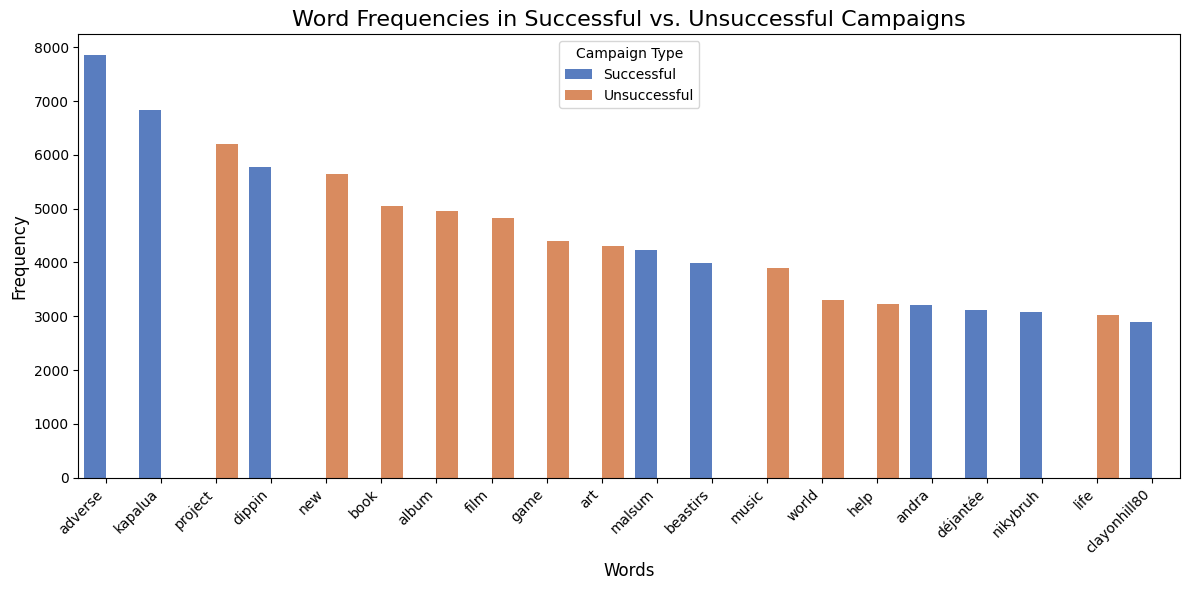

In [41]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted.sort_values('Frequency', ascending=False).head(20),  # Show top 20 words
            x='Word', y='Frequency', hue='Campaign_Type', palette='muted')
plt.title('Word Frequencies in Successful vs. Unsuccessful Campaigns', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Campaign Type')
plt.tight_layout()
plt.show()

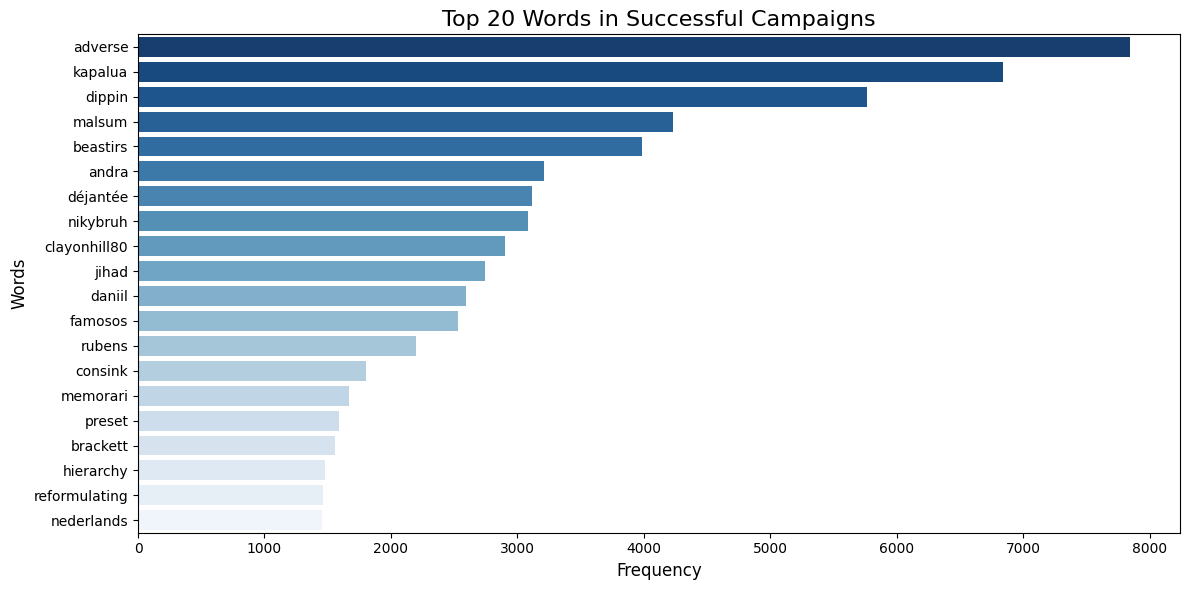

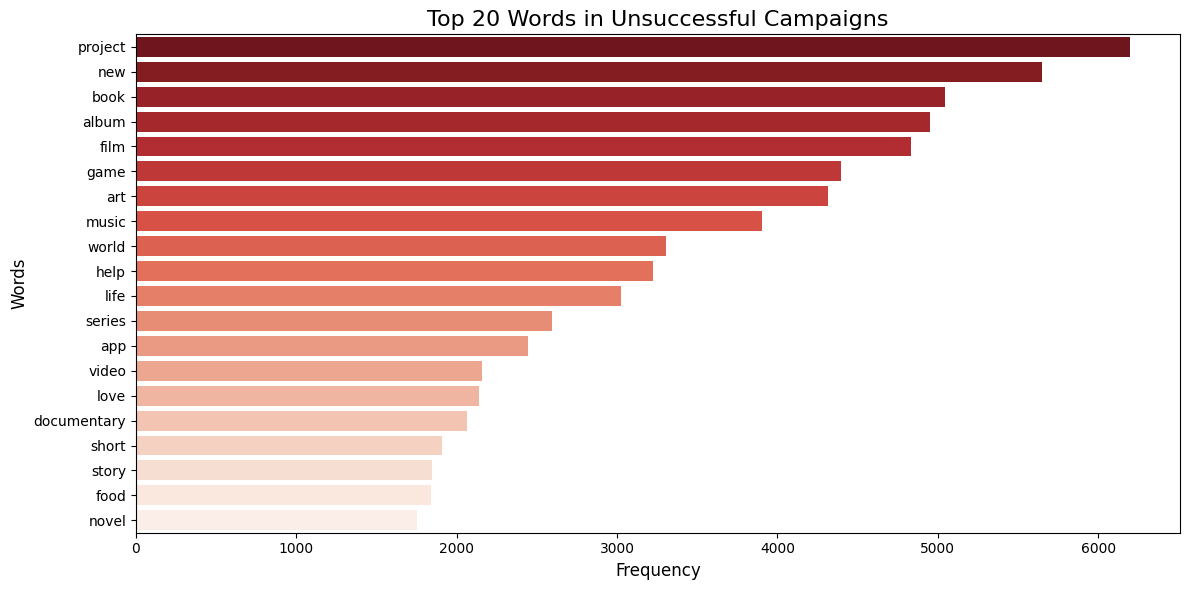

In [42]:
# Prepare data for separate plots
successful_top_words = successful_counts.most_common(20)
unsuccessful_top_words = unsuccessful_counts.most_common(20)

# Convert to DataFrame
df_successful = pd.DataFrame(successful_top_words, columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
df_unsuccessful = pd.DataFrame(unsuccessful_top_words, columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot successful campaigns
plt.figure(figsize=(12, 6))
sns.barplot(data=df_successful, x='Frequency', y='Word', palette='Blues_r')
plt.title('Top 20 Words in Successful Campaigns', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()

# Plot unsuccessful campaigns
plt.figure(figsize=(12, 6))
sns.barplot(data=df_unsuccessful, x='Frequency', y='Word', palette='Reds_r')
plt.title('Top 20 Words in Unsuccessful Campaigns', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()

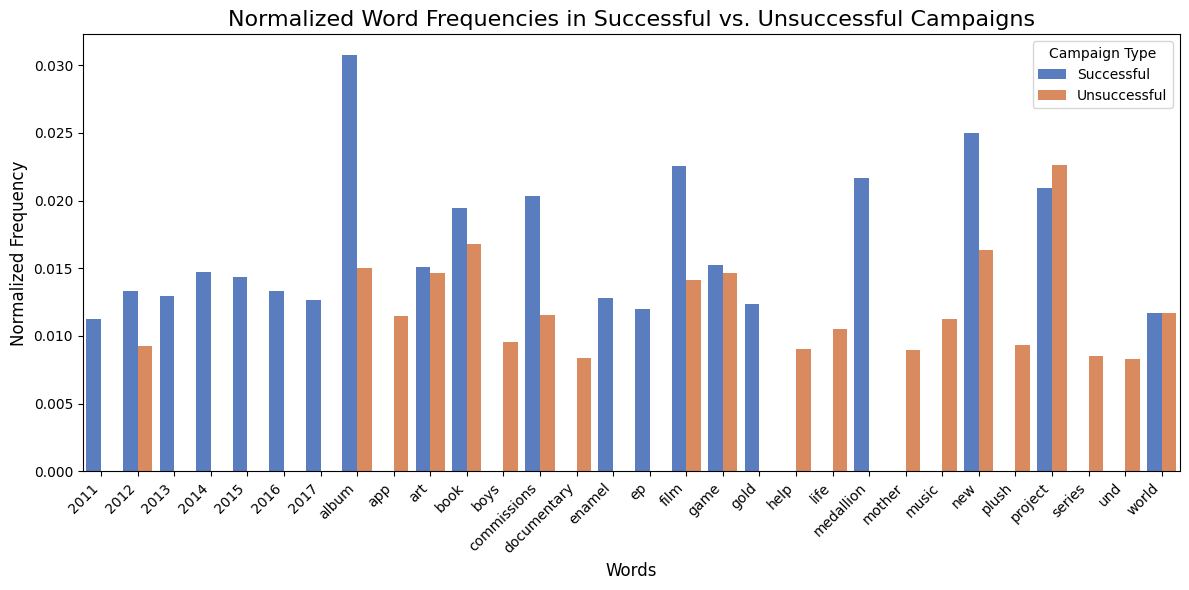

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to process chunks and compute word frequencies for successful and unsuccessful campaigns
def process_in_chunks(df, chunk_size=1000):
    successful_word_counts = []
    unsuccessful_word_counts = []

    # Iterate through the dataset in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]

        # Vectorize the text data for the current chunk
        vectorizer = CountVectorizer(stop_words='english', max_features=5000, min_df=5)
        word_counts = vectorizer.fit_transform(chunk['Name'].fillna(''))

        # Normalize the word counts for the current chunk (convert to a dense array for easier manipulation)
        word_counts_norm = word_counts.multiply(1 / word_counts.sum(axis=1).A)

        # Convert to DataFrame with sparse processing
        words = vectorizer.get_feature_names_out()
        word_freq_df = pd.DataFrame.sparse.from_spmatrix(word_counts_norm, columns=words)
        word_freq_df['State_num'] = chunk['State_num'].values

        # Separate successful and unsuccessful campaigns for the current chunk
        successful_word_counts.append(word_freq_df[word_freq_df['State_num'] == 1].drop('State_num', axis=1).mean())
        unsuccessful_word_counts.append(word_freq_df[word_freq_df['State_num'] == 0].drop('State_num', axis=1).mean())

    # Combine results across all chunks
    successful_words = pd.concat(successful_word_counts, axis=1).mean(axis=1)
    unsuccessful_words = pd.concat(unsuccessful_word_counts, axis=1).mean(axis=1)

    return successful_words, unsuccessful_words

# Process the full dataset in chunks
successful_words, unsuccessful_words = process_in_chunks(df_kickstarter_filtered)

# Get the top 20 most frequent words
top_successful = successful_words.nlargest(20)
top_unsuccessful = unsuccessful_words.nlargest(20)

# Visualization
top_words_df = pd.DataFrame({
    'Successful': top_successful,
    'Unsuccessful': top_unsuccessful
}).stack().reset_index()
top_words_df.columns = ['Word', 'Campaign_Type', 'Normalized_Frequency']

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_words_df, x='Word', y='Normalized_Frequency', hue='Campaign_Type', palette='muted')
plt.title('Normalized Word Frequencies in Successful vs. Unsuccessful Campaigns', fontsize=16)
plt.ylabel('Normalized Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Campaign Type')
plt.tight_layout()
plt.show()


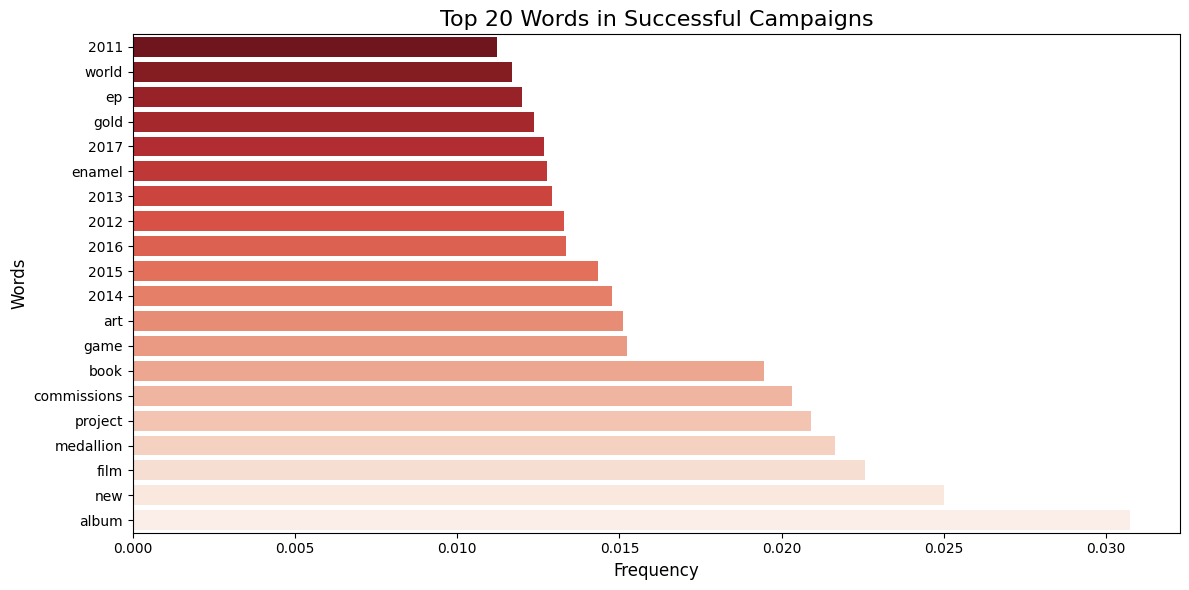

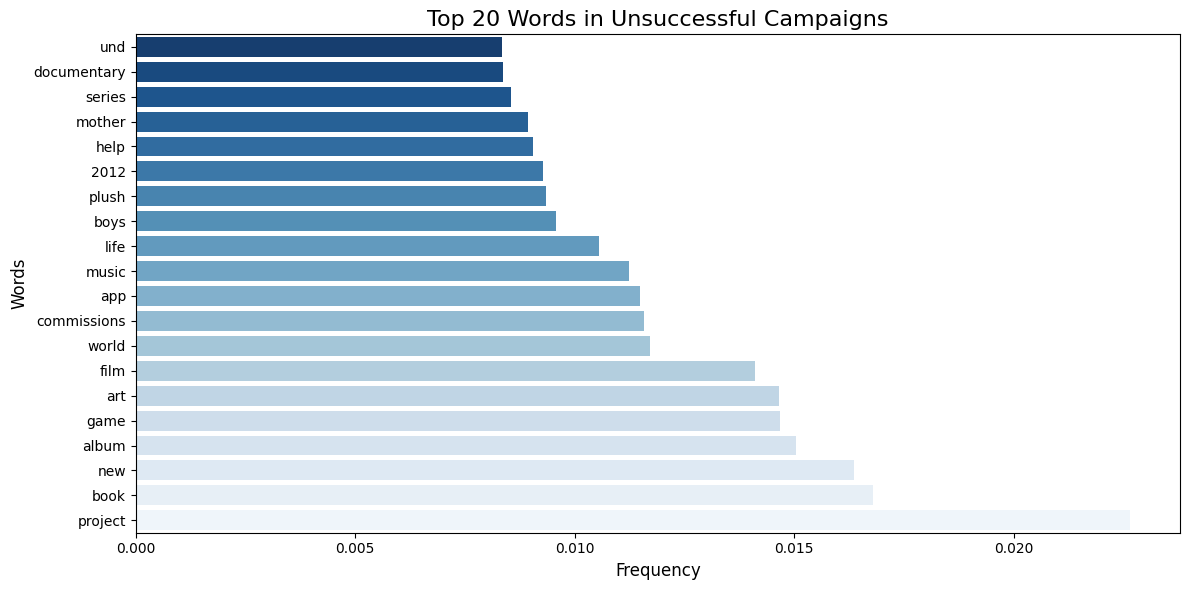

In [45]:
# Prepare the DataFrame for successful and unsuccessful campaigns separately
df_successful = top_successful.reset_index()
df_successful.columns = ['Word', 'Frequency']
df_successful = df_successful.sort_values(by='Frequency', ascending=True)

df_unsuccessful = top_unsuccessful.reset_index()
df_unsuccessful.columns = ['Word', 'Frequency']
df_unsuccessful = df_unsuccessful.sort_values(by='Frequency', ascending=True)

# Plot successful campaigns
plt.figure(figsize=(12, 6))
sns.barplot(data=df_successful, x='Frequency', y='Word', palette='Reds_r')
plt.title('Top 20 Words in Successful Campaigns', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()

# Plot unsuccessful campaigns
plt.figure(figsize=(12, 6))
sns.barplot(data=df_unsuccessful, x='Frequency', y='Word', palette='Blues_r')
plt.title('Top 20 Words in Unsuccessful Campaigns', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()


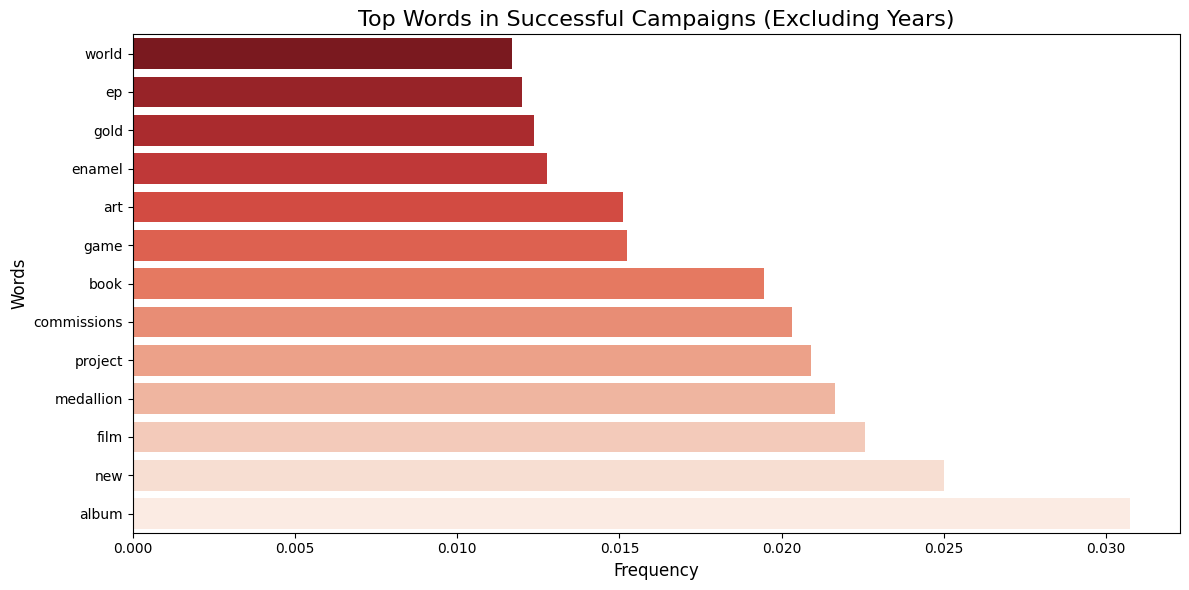

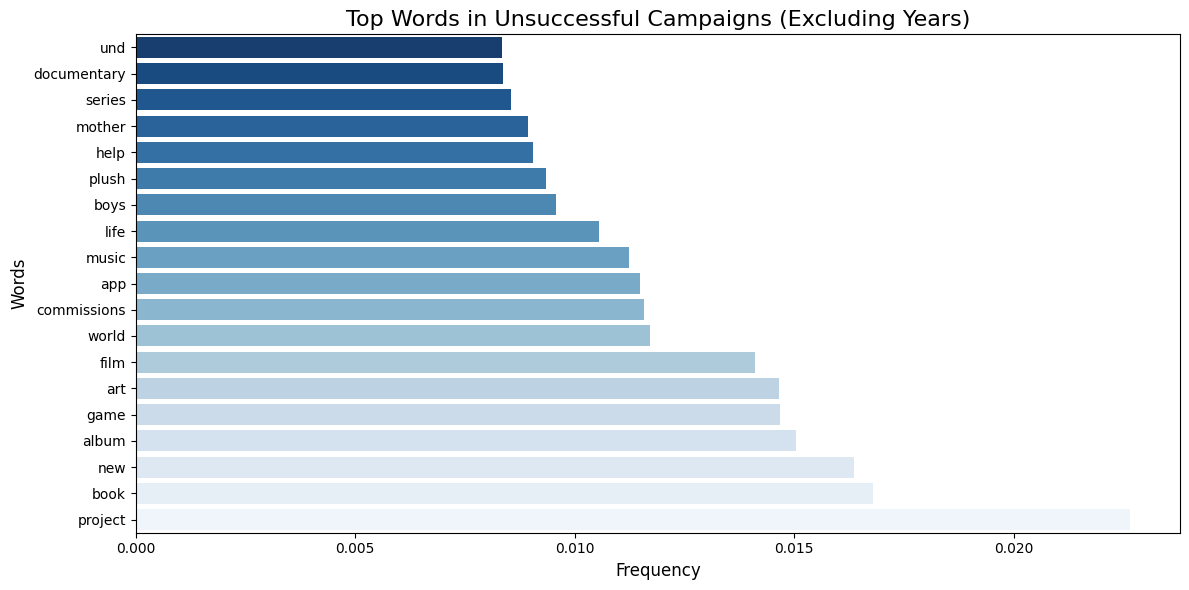

In [47]:
import re

# Define a function to identify words that are likely to be years (4-digit numbers)
def is_year(word):
    return bool(re.match(r'^\d{4}$', word))  # Matches any 4-digit number (like 2021)

# Filter out words that are years (i.e., 4-digit numbers)
df_successful_filtered = df_successful[~df_successful['Word'].apply(is_year)]
df_unsuccessful_filtered = df_unsuccessful[~df_unsuccessful['Word'].apply(is_year)]

# Plot successful campaigns (excluding years)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_successful_filtered, x='Frequency', y='Word', palette='Reds_r')
plt.title('Top Words in Successful Campaigns (Excluding Years)', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()

# Plot unsuccessful campaigns (excluding years)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_unsuccessful_filtered, x='Frequency', y='Word', palette='Blues_r')
plt.title('Top Words in Unsuccessful Campaigns (Excluding Years)', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()


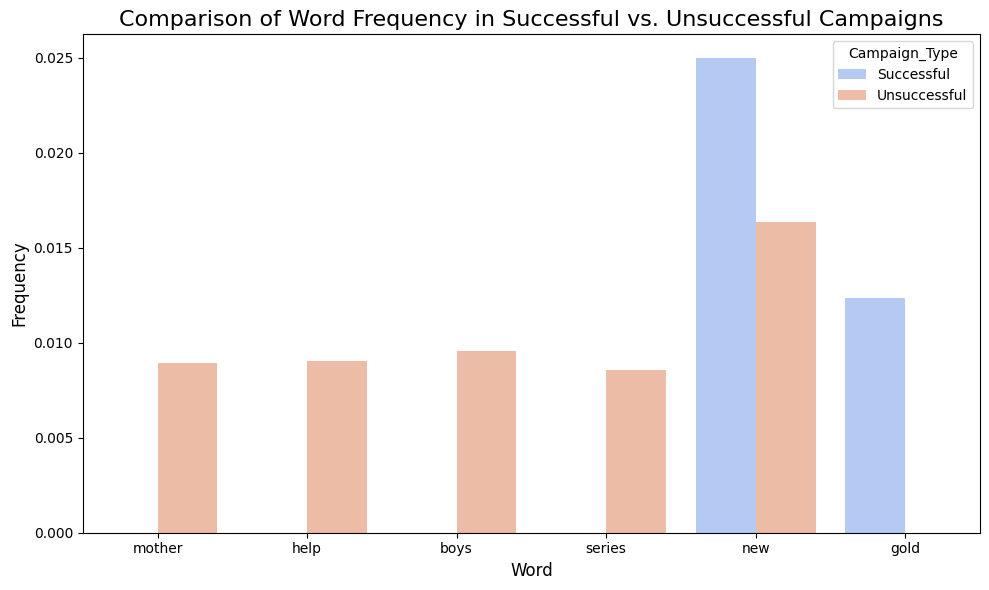

In [55]:
# Define the target words for comparison
target_words = ['mother', 'help', 'boys', 'series', 'new', 'gold']

# Get the frequencies of these words for successful campaigns
df_successful_target = df_successful_filtered[df_successful_filtered['Word'].isin(target_words)]

# Get the frequencies of these words for unsuccessful campaigns
df_unsuccessful_target = df_unsuccessful_filtered[df_unsuccessful_filtered['Word'].isin(target_words)]

# Create a combined DataFrame for plotting (including both successful and unsuccessful campaigns)
df_comparison = pd.DataFrame({
    'Word': target_words,
    'Successful': [df_successful_target[df_successful_target['Word'] == word]['Frequency'].sum() for word in target_words],
    'Unsuccessful': [df_unsuccessful_target[df_unsuccessful_target['Word'] == word]['Frequency'].sum() for word in target_words]
})

# Melt the DataFrame for seaborn bar plot
df_comparison_melted = df_comparison.melt(id_vars='Word', var_name='Campaign_Type', value_name='Frequency')

# Plot the comparison bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comparison_melted, x='Word', y='Frequency', hue='Campaign_Type', palette='coolwarm')
plt.title('Comparison of Word Frequency in Successful vs. Unsuccessful Campaigns', fontsize=16)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

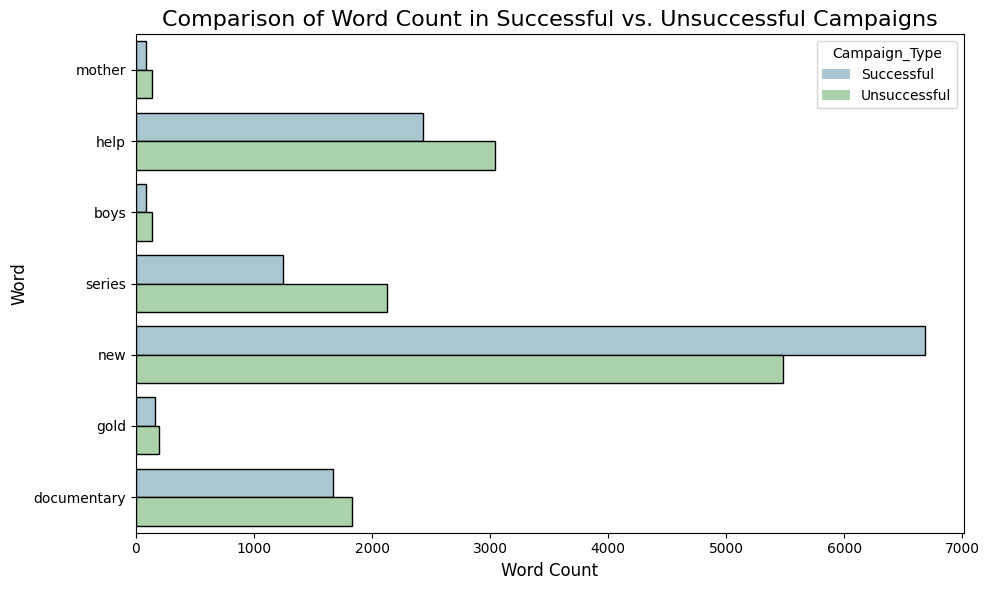

In [81]:
# Define the target words for comparison
target_words = ['mother', 'help', 'boys', 'series', 'new', 'gold', 'documentary']

# Function to process chunks and compute word counts for target words in successful and unsuccessful campaigns
def process_in_chunks_for_target_words(df, target_words, chunk_size=1000):
    successful_word_counts = {word: 0 for word in target_words}
    unsuccessful_word_counts = {word: 0 for word in target_words}

    # Iterate through the dataset in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]

        # Count the occurrences of the target words in successful campaigns
        successful_chunk = chunk[chunk['State_num'] == 1]
        for index, row in successful_chunk.iterrows():
            text = str(row['Name']).lower()  # Only consider 'Name' column for text
            for word in target_words:
                successful_word_counts[word] += text.split().count(word)

        # Count the occurrences of the target words in unsuccessful campaigns
        unsuccessful_chunk = chunk[chunk['State_num'] == 0]
        for index, row in unsuccessful_chunk.iterrows():
            text = str(row['Name']).lower()  # Only consider 'Name' column for text
            for word in target_words:
                unsuccessful_word_counts[word] += text.split().count(word)

    return successful_word_counts, unsuccessful_word_counts

# Process the full dataset in chunks
successful_word_counts, unsuccessful_word_counts = process_in_chunks_for_target_words(df_kickstarter_filtered, target_words)

# Create a DataFrame for comparison
df_comparison = pd.DataFrame({
    'Word': target_words,
    'Successful': [successful_word_counts[word] for word in target_words],
    'Unsuccessful': [unsuccessful_word_counts[word] for word in target_words]
})

# Melt the DataFrame for seaborn bar plot
df_comparison_melted = df_comparison.melt(id_vars='Word', var_name='Campaign_Type', value_name='Word_Count')

# Sort the DataFrame by Word_Count in descending order
df_comparison_melted_sorted = df_comparison_melted.sort_values(by='Word_Count', ascending=False)

palette = ['#A3C9D8', '#A3D9A5'] # Pastel green and blue 

# Plot the comparison bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_comparison_melted, x='Word_Count', y='Word', hue='Campaign_Type', palette=palette)

# Add a line around the bars (outer rim)
for patch in ax.patches:
    patch.set_edgecolor('black')  # Black line around the bars
    patch.set_linewidth(1)  # Adjust the thickness of the border

plt.title('Comparison of Word Count in Successful vs. Unsuccessful Campaigns', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

# One-hot Encoding categorical features

In [38]:
# Categorical columns
categorical_cols = ['Category', 'Subcategory', 'Country', 'DayOfWeek', 'LaunchMonth', 'LaunchYear']

In [39]:
# Create column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough' #keep other columns as they are
)

In [40]:
# Apply one-hot encoding
encoded_data = ct.fit_transform(df_kickstarter_filtered)

In [41]:
# Ensure proper DF Conversion
encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())

# Infer numeric types
encoded_df = encoded_df.apply(pd.to_numeric, errors='ignore')

# Check
encoded_df.dtypes

encoder__Category_Art       float64
encoder__Category_Comics    float64
encoder__Category_Crafts    float64
encoder__Category_Dance     float64
encoder__Category_Design    float64
                             ...   
remainder__glove_dim_46     float64
remainder__glove_dim_47     float64
remainder__glove_dim_48     float64
remainder__glove_dim_49     float64
remainder__glove_dim_50     float64
Length: 290, dtype: object

In [42]:
#Verification: Check the shape of the DataFrame
print("Original DataFrame shape:", df_kickstarter_filtered.shape)
print("Encoded DataFrame shape:", encoded_df.shape)

Original DataFrame shape: (331462, 72)
Encoded DataFrame shape: (331462, 290)


In [43]:
encoded_df = encoded_df.fillna(0)

# Combining and Dropping Columns

In [44]:
# Make a copy of our df to be on the safe side
final_df = encoded_df.copy()

#### Drop Subcategory Columns

In [45]:
# Identify Subcategory Columns
subcategory_columns = final_df.filter(regex='^encoder__Subcategory_').columns

# Remove Subcategory Columns
reduced_final_df = final_df.drop(columns=subcategory_columns)
print(f"Shape of DataFrame after removing subcategory columns: {reduced_final_df.shape}")

Shape of DataFrame after removing subcategory columns: (331462, 131)


#### Combine Countries to Continents

In [46]:
# Dictionary for mapping
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Netherlands': 'Europe',
    'Belgium': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Luxembourg': 'Europe',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Japan': 'Asia',
}

In [47]:
# Create Country Column and map them to continents
country_cols = reduced_final_df.filter(regex='^encoder__Country_').columns

continent_features = {}
for country_col in country_cols:
    country = country_col.replace('encoder__Country_', '')
    if country in country_to_continent:
        continent = country_to_continent[country]
        if continent not in continent_features:
            continent_features[continent] = 0
        continent_features[continent] += reduced_final_df[country_col]

In [48]:
# Create new continent columns 
for continent, values in continent_features.items():
    reduced_final_df[f'continent_{continent}'] = values

In [49]:
# Remove the original country columns
reduced_final_df = reduced_final_df.drop(columns=country_cols)

In [50]:
# Verify
print(reduced_final_df.shape)

(331462, 113)


#### Remove redundant columns/columns introducing data leakage

In [51]:
# Identify redundant columns
columns_to_remove = [
    'remainder__ID', 
    'remainder__Name', 
    'remainder__cleaned_name', 
    'remainder__cluster',
    'remainder__Backers',    #I decided to remove the original columns and keep the log transformed ones
    'remainder__Goal',
    'remainder__Pledged',
    'remainder__State',  #remove original column to only keep the binary state num column
    'remainder__Launched',    #remove columns in datetime format to make downstream analysis easier
    'remainder__Deadline',
    'remainder__log_Backers',   #remove highly correlated features
    'remainder__log_Pledged'
    ]

# Drop columns
reduced_final_df = reduced_final_df.drop(columns=columns_to_remove)

In [52]:
reduced_final_df.shape

(331462, 101)

#### Cleaning up Column Names

In [53]:
# Function to clean column names
def clean_column_names(col_name):
    # Remove known prefixes
    col_name = col_name.replace('encoder__', '').replace('remainder__', '')
    # Optionally, replace underscores with spaces or hyphens for better readability
    col_name = col_name.replace('_', ' ')
    return col_name

# Apply the function to rename columns
reduced_final_df.columns = [clean_column_names(col) for col in reduced_final_df.columns]


## Splitting data for testing 

In [54]:
# Defining the target variable
y = reduced_final_df['State num']

# Defining the input features
X = reduced_final_df.drop('State num', axis=1)

In [55]:
# Split data into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [56]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline model

In [57]:
# Set up baseline model
baseline_model = LogisticRegression(random_state=10, max_iter=1000)

In [58]:
# Fit the model
baseline_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [59]:
# Make predictions
y_pred = baseline_model.predict(X_test_scaled)

#### Evaluate the baseline model

In [60]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.6580785301615555
Confusion Matrix:
[[31843  7680]
 [14987 11783]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74     39523
           1       0.61      0.44      0.51     26770

    accuracy                           0.66     66293
   macro avg       0.64      0.62      0.62     66293
weighted avg       0.65      0.66      0.65     66293



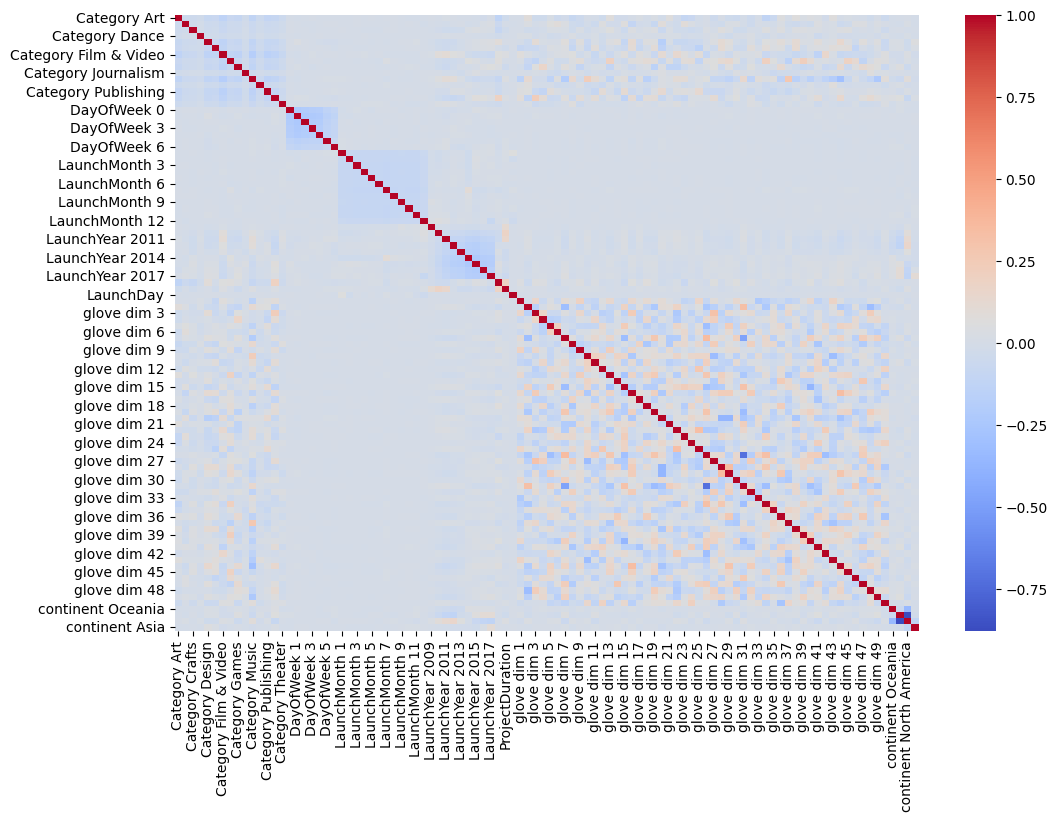

In [61]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create a correlation matrix
corr_matrix = X_train_scaled_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.show()

In [62]:
# Set a correlation threshold
correlation_threshold = 0.9

# Find highly correlated features
high_corr_pairs = []
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):  # Only check upper triangle of the matrix
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display the highly correlated pairs
print("Highly correlated features (|correlation| > 0.9):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


Highly correlated features (|correlation| > 0.9):


## PCA

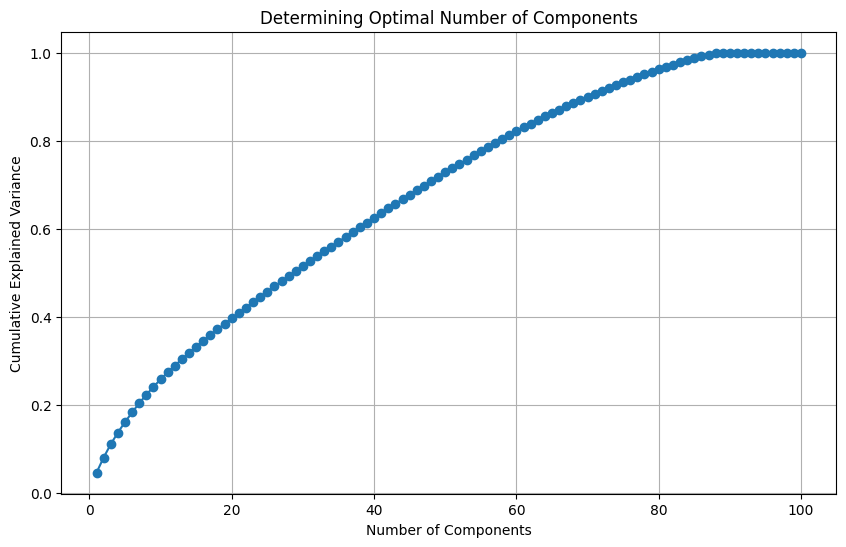

In [100]:
# Determine optimal number of components
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_test_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Determining Optimal Number of Components")
plt.grid(True)
plt.show()


In [102]:
# Choose the optimal number of components
n_components = 40

In [103]:
# Apply PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Training the model

#### Random Forest

In [63]:
# Define the model: Random Forest
rf_model = RandomForestClassifier(random_state=SEED)

In [64]:
# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [65]:
# Subsample training data 
X_train_subsampled, y_train_subsampled = shuffle(X_train_scaled, y_train, random_state=SEED, n_samples=int(0.2*len(X_train_scaled)))

In [ ]:
# Perform GridSearchCV for hyperparameter tuning - needs to only be done once!
#grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='precision_weighted') 
#grid_search.fit(X_train_subsampled, y_train_subsampled)

KeyboardInterrupt: 

In [ ]:
# Get the best model
#best_rf_model = grid_search.best_estimator_

In [ ]:
# Check best parameters
#best_params = grid_search.best_params_
#print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [67]:
# Create new RFC with the best hyperparameters
best_rf_model = RandomForestClassifier(
    max_depth=20,
    min_samples_split=10,
    n_estimators=200, 
    random_state=SEED
    )

In [110]:
# Train
best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=50)

In [111]:
# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)

In [112]:
# Evaluate on the test set
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])}")

              precision    recall  f1-score   support

           0       0.68      0.85      0.76     39523
           1       0.65      0.40      0.50     26770

    accuracy                           0.67     66293
   macro avg       0.66      0.63      0.63     66293
weighted avg       0.67      0.67      0.65     66293

[[33708  5815]
 [15945 10825]]
AUC-ROC: 0.7214388309201347


##### Feature Importance

In [113]:
# Get feature importances
importances = best_rf_model.feature_importances_
print(importances)

[0.00119371 0.0057855  0.00220771 0.00345003 0.0020002  0.00551918
 0.0025207  0.0041649  0.00214419 0.00068155 0.01076495 0.00117651
 0.00378972 0.01054622 0.01046856 0.0013698  0.00246267 0.00146541
 0.00130857 0.00139666 0.00135013 0.00104565 0.0011601  0.00137219
 0.00146182 0.00139944 0.00128476 0.00130659 0.00191806 0.0012588
 0.00135082 0.00135563 0.00128995 0.00111949 0.00020038 0.00085041
 0.00292981 0.00228627 0.00370591 0.00343198 0.00768247 0.00144589
 0.00169849 0.09909628 0.04833616 0.0122367  0.01382353 0.01425307
 0.01370698 0.01437146 0.01387907 0.01440583 0.01421239 0.01396253
 0.01461018 0.01466884 0.01386905 0.01351478 0.01354937 0.01423314
 0.01360006 0.01449516 0.01362979 0.0145867  0.02080469 0.01372773
 0.0138108  0.01472189 0.01410924 0.01488168 0.01395258 0.01443445
 0.01408883 0.01373979 0.0144835  0.01400368 0.01523457 0.01455717
 0.01414897 0.01451275 0.01428447 0.01364986 0.01643272 0.01364443
 0.01362571 0.01369381 0.01364979 0.0134195  0.01353972 0.01770

In [114]:
feature_names = X_test.columns  # Assuming you have column names in X_train_scaled
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                Feature  Importance
43             log Goal    0.099096
44      ProjectDuration    0.048336
64         glove dim 19    0.020805
89         glove dim 44    0.017709
82         glove dim 37    0.016433
..                  ...         ...
35      LaunchYear 2010    0.000850
9   Category Journalism    0.000682
96    continent Oceania    0.000615
34      LaunchYear 2009    0.000200
99       continent Asia    0.000153

[100 rows x 2 columns]


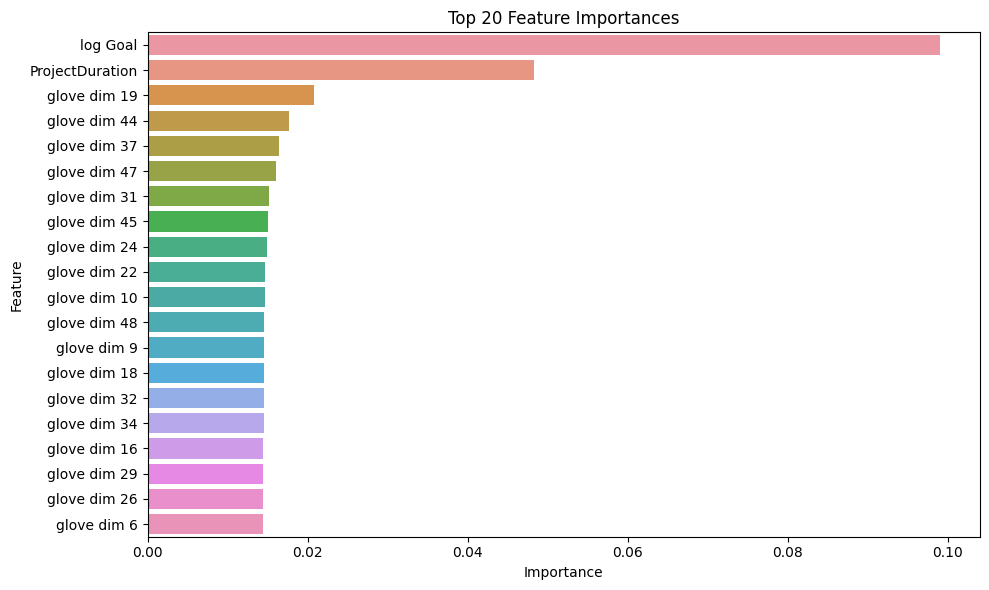

In [115]:
# Visualisation: Feature Importance (top20)
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(top_n))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Feature Importances")
plt.tight_layout()
plt.show()

##### Best Model from Marcelina

In [ ]:
# Create new RFC with the best hyperparameters from Marcelina
marcelina_best_rf_model = RandomForestClassifier(
    n_estimators = 115,
    min_samples_split = 10,
    min_samples_leaf=10,
    max_features=0.8,
    max_depth=20,
    bootstrap=True, 
    random_state=SEED
    )

In [ ]:
# Train
marcelina_best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, max_features=0.8, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=115, random_state=50)

In [ ]:
# Make predictions
y_pred = marcelina_best_rf_model.predict(X_test_scaled)

In [ ]:
# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, marcelina_best_rf_model.predict_proba(X_test_scaled)[:, 1])}")

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     39523
           1       0.63      0.49      0.55     26770

    accuracy                           0.68     66293
   macro avg       0.66      0.65      0.65     66293
weighted avg       0.67      0.68      0.67     66293

[[31631  7892]
 [13553 13217]]
AUC-ROC: 0.7262218655260015


In [ ]:
import shap

# Explain model predictions using SHAP
explainer = shap.TreeExplainer(marcelina_best_rf_model)  
shap_values = explainer.shap_values(X_train_subsampled)  

# Create summary plot
shap.summary_plot(shap_values, X_train_subsampled, feature_names=feature_names)

: 

: 

#### Best Model from Dima

In [116]:
# Create new RFC with the best hyperparameters from Marcelina
dima_best_rf_model = RandomForestClassifier(
    n_estimators = 50,
    min_samples_split = 15,
    min_samples_leaf=10,
    max_features=0.8,
    max_depth=20,
    bootstrap=True, 
    random_state=SEED
    )

In [117]:
#  Train
dima_best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, max_features=0.8, min_samples_leaf=10,
                       min_samples_split=15, n_estimators=50, random_state=50)

In [118]:
# Make predictions
y_pred = dima_best_rf_model.predict(X_test_scaled)

In [119]:
# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, dima_best_rf_model.predict_proba(X_test_scaled)[:, 1])}")

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     39523
           1       0.63      0.49      0.55     26770

    accuracy                           0.68     66293
   macro avg       0.66      0.65      0.65     66293
weighted avg       0.67      0.68      0.67     66293

[[31613  7910]
 [13545 13225]]
AUC-ROC: 0.724153900977033


#### XGBoost

In [74]:
# Define the Model: XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=SEED, eval_metric='logloss')

In [75]:
# Hyperparameter Tuning: Define Parameters for Tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
# Perform GridSearchCV - needs to be run only once!
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='precision_weighted', verbose=1, n_jobs=2)
#grid_search.fit(X_train_subsampled, y_train_subsampled)
#best_xgb_model = grid_search.best_estimator_
#print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [76]:
# Create new xgboost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    random_state=SEED, 
    eval_metric='logloss',
    learning_rate=0.05, 
    n_estimators=200, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=1.0
    )

In [77]:
# Train the best parameter XGBoost model
best_xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=50, ...)

In [78]:
# Make predictions with best parameters
y_pred = best_xgb_model.predict(X_test_scaled)
y_prob = best_xgb_model.predict_proba(X_test_scaled)[:, 1] #Probability of success (class 1)

In [79]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     39523
           1       0.64      0.50      0.56     26770

    accuracy                           0.68     66293
   macro avg       0.67      0.65      0.66     66293
weighted avg       0.68      0.68      0.67     66293

Accuracy: 0.6827870212541294
AUC-ROC: 0.7376650040715738


##### Feature Importance

In [80]:
# Get feature importances
importances_xgb = best_xgb_model.feature_importances_
print(importances_xgb)

[0.00512893 0.02879727 0.03396294 0.02962028 0.00788331 0.04491644
 0.01044777 0.01739406 0.01016574 0.02465738 0.06169857 0.01932679
 0.02515913 0.02459037 0.04124499 0.00479731 0.00992533 0.00606526
 0.00328592 0.00921577 0.01307424 0.         0.00554241 0.00660708
 0.00712181 0.00416264 0.00323724 0.00270208 0.02417681 0.01549188
 0.00253968 0.00413213 0.00351548 0.00927484 0.         0.00842698
 0.01140964 0.00689117 0.009029   0.02769115 0.03218171 0.0141263
 0.00822168 0.04882592 0.02959705 0.00523709 0.00388899 0.00316686
 0.0032887  0.00577499 0.00469267 0.00489683 0.00508455 0.00434005
 0.00548944 0.00640683 0.0038713  0.00344606 0.00419904 0.00428524
 0.00364738 0.00349368 0.00319885 0.00446175 0.01555901 0.00395604
 0.00505998 0.00480095 0.00421437 0.00758792 0.00446956 0.0056174
 0.00478325 0.00449403 0.00516876 0.00539032 0.00681798 0.00540026
 0.00522535 0.00596    0.00505359 0.00378212 0.00880912 0.00460527
 0.00355816 0.00348868 0.00344114 0.0032121  0.00398091 0.006619

In [81]:
# Get Column Names
feature_names = X_test.columns  # Assuming you have column names in X_train_scaled
feature_importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
})
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
print(feature_importance_df_xgb)

             Feature  Importance
10    Category Music    0.061699
43          log Goal    0.048826
5   Category Fashion    0.044916
14  Category Theater    0.041245
2    Category Crafts    0.033963
..               ...         ...
91      glove dim 46    0.003028
27     LaunchMonth 6    0.002702
30     LaunchMonth 9    0.002540
21       DayOfWeek 6    0.000000
34   LaunchYear 2009    0.000000

[100 rows x 2 columns]


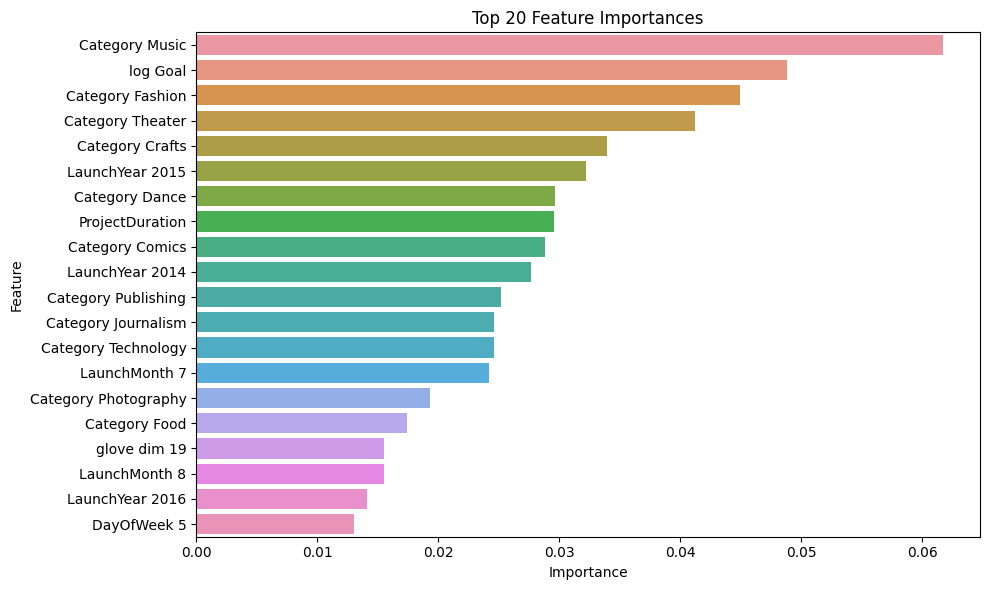

In [82]:
# Visualisation: Feature Importance (top20)
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df_xgb.head(top_n))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Feature Importances")
plt.tight_layout()
plt.show()

##### Approach to Maximize Precision

In [83]:
# Adjust classification Threshold 
threshold = 0.78
y_pred_high_precision = (best_xgb_model.predict_proba(X_test_scaled)[:, 1] >= threshold).astype(int)
print(classification_report(y_test, y_pred_high_precision))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     39523
           1       0.86      0.02      0.05     26770

    accuracy                           0.60     66293
   macro avg       0.73      0.51      0.40     66293
weighted avg       0.70      0.60      0.47     66293



In [84]:
# Calculate precision-recall curve
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [85]:
# Calculate AUC-PRC
auc_prc = auc(recall, precision)
print(f"AUC-PRC: {auc_prc}")

AUC-PRC: 0.6378008756487037


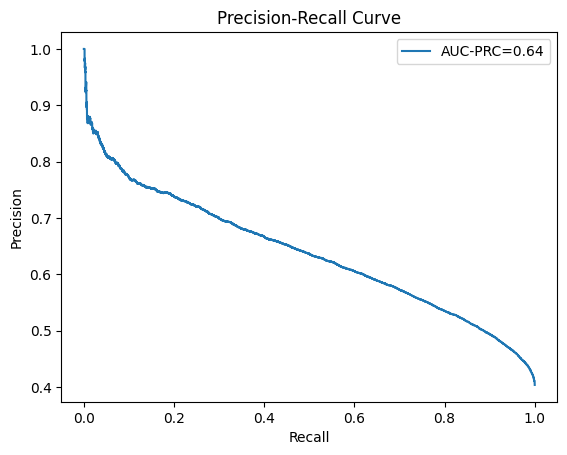

In [86]:
# Visualize
plt.plot(recall, precision, label=f"AUC-PRC={auc_prc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [87]:
# Find the threshold that maximizes precision
best_threshold_precision = thresholds[np.argmax(precision)]
print(f"Best Threshold (maximizing precision): {best_threshold_precision}")

Best Threshold (maximizing precision): 0.8641870021820068


In [88]:
# Find the threshold that maximizes f1
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)] 
print(f"Best Threshold (maximizing F1-score): {best_threshold}")

Best Threshold (maximizing F1-score): 0.33205845952033997


In [89]:
# Apply the threshold to make predictions
y_pred_thresholded = (y_prob >= best_threshold).astype(int)

In [90]:
# Evaluate the model
print(classification_report(y_test, y_pred_thresholded))

              precision    recall  f1-score   support

           0       0.81      0.50      0.62     39523
           1       0.53      0.83      0.64     26770

    accuracy                           0.63     66293
   macro avg       0.67      0.66      0.63     66293
weighted avg       0.70      0.63      0.63     66293



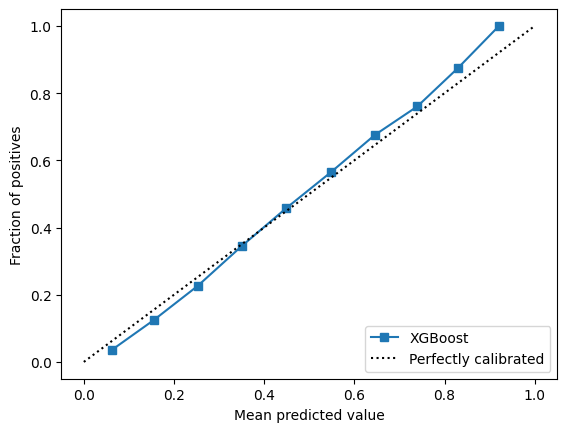

In [91]:
# Check Model Calibration
from sklearn.calibration import calibration_curve
prob_pos = best_xgb_model.predict_proba(X_test_scaled)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
import matplotlib.pyplot as plt
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="XGBoost")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.show()

##### Cost-Sensitive Learning to balance out Classes

In [92]:
# Get inverse ratio 
n_samples_0 = np.sum(y_train == 0)
n_samples_1 = np.sum(y_train == 1)

weight_0 = n_samples_1 / len(y_train)  #Inverse ratio
weight_1 = n_samples_0 / len(y_train)  #Inverse ratio

class_weights = {0: weight_0, 1: weight_1} #Create a dictionary for scikit-learn

#For XGBoost, use scale_pos_weight:
scale_pos_weight = n_samples_0 / n_samples_1  #Ratio of majority to minority

In [93]:
# Cost-Sensitive Learning (revisited): penalizing false-negatives
model_cost_sensitive_xgb = xgb.XGBClassifier(
    colsample_bytree = 1.0, 
    learning_rate = 0.05,
    max_depth = 6, 
    n_estimators = 200, 
    subsample = 0.8,
    use_label_encoder = False, 
    eval_metric='logloss', 
    scale_pos_weight=scale_pos_weight 
    )
model_cost_sensitive_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [94]:
# Make predictions after cost-sensitive learning (penalizing false-negatives)
y_pred = model_cost_sensitive_xgb.predict(X_test_scaled)
y_prob = model_cost_sensitive_xgb.predict_proba(X_test_scaled)[:, 1] #Probability of success (class 1)

#Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")

              precision    recall  f1-score   support

           0       0.76      0.65      0.70     39523
           1       0.57      0.69      0.63     26770

    accuracy                           0.67     66293
   macro avg       0.67      0.67      0.66     66293
weighted avg       0.68      0.67      0.67     66293

Accuracy: 0.6687433062314272
AUC-ROC: 0.7373805718739488


#### Support Vector Machine

In [ ]:
# Initialize the SVM model
svm_model = SVC(random_state=SEED)

In [ ]:
# Set up parameters for tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}

In [ ]:
# Include a time limit to stop GridSearchCV
import time
start_time = time.time()
max_time = 3600  # Stop after 1 hour

grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, scoring='precision_weighted', n_jobs=-1)

try:
    grid_search.fit(X_train_subsampled, y_train_subsampled)
    elapsed_time = time.time() - start_time
    if elapsed_time > max_time:
        print("Time limit exceeded, but GridSearchCV completed.")

except KeyboardInterrupt:
    print("GridSearchCV manually interrupted.")
    # Save results even if interrupted (the results will be partially complete):
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df.to_csv("grid_search_results_interrupted.csv", index=False)

except Exception as e:
    print(f"An error occurred: {e}")
    # Handle other potential errors

else:  # This block runs only if no exception occurs
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df.to_csv("grid_search_results.csv", index=False)


print("Best estimator:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=12.4min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=12.5min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=12.6min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=12.6min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=12.6min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=13.4min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=13.5min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=13.6min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=11.7min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=11.8min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=11.8min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=11.5min


/Users/vanessaroth/Desktop/NeueFischeProjects/20241121_MLProject/ML_GroupProject/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=11.9min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=13.4min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=13.4min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=13.2min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.3min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.3min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.8min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.2min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=12.5min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=12.6min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=12.6min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=12.6min
[CV] END ...................

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
results_df = pd.read_csv("grid_search_results_interrupted.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'grid_search_results_interrupted.csv'

In [ ]:
# Get the best model and hyperparameters
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Best model: {best_svm_model}")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
# Train
best_svm_model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions
y_pred = best_svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, best_svm_model.predict_proba(X_test_scaled)[:, 1])}")

## Stacking 

In [95]:
# Define base estimators (my models so far: LR, RF, and XGBoost)
estimators = [
    ('lr', baseline_model),
    ('rf', best_rf_model),
    ('xgb', best_xgb_model)
]

In [96]:
# Create the stacking classifier with a meta-learner (e.g., Logistic Regression)
stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),  
    stack_method='predict_proba', 
    cv=5 
)

In [97]:
# Train the stacked model
stacked_model.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=10)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       random_state=50)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0,
                                              early_stopping_rounds=None,
                                              e...
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=50, ...))],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [98]:
# Make predictions on the test set
y_pred = stacked_model.predict(X_test_scaled)

In [99]:
# Evaluate the stacked model
#Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     39523
           1       0.63      0.52      0.57     26770

    accuracy                           0.68     66293
   macro avg       0.67      0.66      0.66     66293
weighted avg       0.68      0.68      0.68     66293

Accuracy: 0.6837071787368199
AUC-ROC: 0.7373805718739488
